In [22]:
# Fetch data from online datasource
import bs4 as bs
import urllib.request
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\winuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#https://en.wikipedia.org/wiki/Game_of_Thrones
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Data_science').read()

In [6]:
soup = bs.BeautifulSoup(source,'lxml') #lsml is type of parser that beautifulsoup uses to parse html document

In [69]:
#fetching string data
text = ""
for para in soup.find_all('p'): #fetching the text under p tag in html
    text +=para.text

In [20]:
# Preprocessing
text = re.sub(r"\[[0-9]*\]"," ",text) # removing all element like [1][2]..
text = re.sub(r"\s+"," ",text)

clean_text = text.lower()

clean_text = re.sub(r'\W',' ',clean_text) # removing non word charachter
clean_text = re.sub(r'\d',' ',clean_text) # removing digits
clean_text = re.sub(r'\s+',' ',clean_text) # removing extra spaces

In [24]:
# Tokenize Article sentences
sentences = nltk.sent_tokenize(text)
len(sentences)

67

In [25]:
stop_words = nltk.corpus.stopwords.words('english')

In [27]:
# Histogram
word2count = {}
for word in nltk.word_tokenize(clean_text):
    if word not in stop_words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [29]:
# Weighted Histogram
for key in word2count.keys():
    word2count[key] =word2count[key]/max(word2count.values())

In [44]:
word2count

0.009615384615384616

In [51]:
# Calculating sentence scores

sent2score = {}
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word2count.keys():
            if len(sentence.split(' '))<25:
                if sentence not in sent2score.keys():
                    sent2score[sentence] = word2count[word]
                else:
                    sent2score[sentence] += word2count[word]
            

In [52]:
len(sent2score)

33

In [53]:
# Getting the summary
import heapq

best_sentences = heapq.nlargest(5,sent2score,key=sent2score.get)

In [54]:
best_sentences

['In 2013, the first "European Conference on Data Analysis (ECDA)" was organised in Luxembourg, establishing the European Association for Data Science (EuADS).',
 'In this lecture, he characterized statistical work as a trilogy of data collection, data modeling and analysis, and decision making.',
 'In a 2014 Wall Street Journal article, Irving Wladawsky-Berger compares the data science enthusiasm with the dawn of computer science.',
 'The first international conference: IEEE International Conference on Data Science and Advanced Analytics was launched in 2014.',
 'In 2014, General Assembly launched student-paid bootcamp and The Data Incubator launched a competitive free data science fellowship.']

In [55]:
print('------------------------------------------------------------')
for sentence in best_sentences:
    print(sentence)

------------------------------------------------------------
In 2013, the first "European Conference on Data Analysis (ECDA)" was organised in Luxembourg, establishing the European Association for Data Science (EuADS).
In this lecture, he characterized statistical work as a trilogy of data collection, data modeling and analysis, and decision making.
In a 2014 Wall Street Journal article, Irving Wladawsky-Berger compares the data science enthusiasm with the dawn of computer science.
The first international conference: IEEE International Conference on Data Science and Advanced Analytics was launched in 2014.
In 2014, General Assembly launched student-paid bootcamp and The Data Incubator launched a competitive free data science fellowship.


In [66]:
# Wordcloud practice
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [60]:
text = 'Hi ram ram ram ram, kya kar rahi hai, kaise ho,khana khana khana khake jao haa, thik hai'\


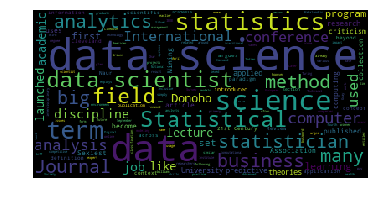

In [71]:
basecloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(basecloud)
plt.axis('off')
plt.show()